In [1]:
import sys
sys.path.append('../')
from _imports import *

import keras

In [2]:
train_X = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
test_X = pd.read_csv('../data/preprocess/test_X.csv').to_numpy()
train_y = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()

train_X_nas: np.ndarray = pd.read_csv('../data/preprocess/na/train_X.csv').eq(1).to_numpy()
test_X_nas: np.ndarray = pd.read_csv('../data/preprocess/na/test_X.csv').eq(1).to_numpy()

FIXATE MISSING

In [3]:
keras.utils.set_random_seed(110)

n_features = train_X.shape[1]
num_features = 32
ord_features = 21
bin_features = n_features - num_features - ord_features

train_X1 = train_X[:, :num_features]
train_X2 = train_X[:, num_features:num_features+ord_features]
train_X3 = train_X[:, num_features+ord_features:]

input = keras.layers.Input(shape=(n_features,), name="input")
hidden1 = keras.layers.Dense(
  250, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden1",
)(input)
hidden1d = keras.layers.Dropout(0.01, seed=101, name="dropout1")(hidden1)
hidden2 = keras.layers.Dense(
  25, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden2",
)(hidden1d)
hidden2d = keras.layers.Dropout(0.01, seed=101, name="dropout2")(hidden2)
hidden3 = keras.layers.Dense(
  10, activation="sigmoid",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden3",
)(hidden2d)
hidden3d = keras.layers.Dropout(0.01, seed=101, name="dropout3")(hidden3)
hidden4 = keras.layers.Dense(
  25, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden4",
)(hidden3d)
hidden4d = keras.layers.Dropout(0.01, seed=101, name="dropout4")(hidden4)
hidden5 = keras.layers.Dense(
  250, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden5",
)(hidden4d)
hidden5d = keras.layers.Dropout(0.01, seed=101, name="dropout5")(hidden5)
output1 = keras.layers.Dense(num_features, activation="linear", name="output1")(hidden5d)
output2 = keras.layers.Dense(ord_features, activation="linear", name="output2")(hidden5d)
output3 = keras.layers.Dense(bin_features, activation="sigmoid", name="output3")(hidden5d)
output4 = keras.layers.Dense(1, activation="linear", name="output4")(hidden5d)
model = keras.Model(inputs=input, outputs=[output1, output2, output3, output4], name="model")

model.compile(
    loss=[
      keras.losses.MeanSquaredError(name="MSE"), 
      keras.losses.MeanSquaredError(name="MSE"), 
      keras.losses.BinaryCrossentropy(name="CEN"),
      keras.losses.MeanSquaredError(name="MSE"), 
    ],
    optimizer=keras.optimizers.Adam(),
)

history = model.fit(
    train_X,
    [train_X1, train_X2, train_X3, train_y],
    epochs=250,
);

print("train:", model.evaluate(
  train_X,
  [train_X1, train_X2, train_X3, train_y],
  verbose=0,
))

Epoch 1/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - loss: 3.4051 - output1_loss: 1.0648 - output2_loss: 0.9801 - output3_loss: 0.6280 - output4_loss: 0.6240
Epoch 2/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.1836 - output1_loss: 0.8638 - output2_loss: 0.8069 - output3_loss: 0.2443 - output4_loss: 0.1539
Epoch 3/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1963 - output1_loss: 0.9496 - output2_loss: 0.8399 - output3_loss: 0.1883 - output4_loss: 0.1240
Epoch 4/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0107 - output1_loss: 0.8475 - output2_loss: 0.7841 - output3_loss: 0.1808 - output4_loss: 0.1119
Epoch 5/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8521 - output1_loss: 0.7565 - output2_loss: 0.7394 - output3_loss: 0.1728 - output4_loss: 0.0982
Epoch 6/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7865 - output1_loss: 0.7248 - output2_loss: 0.7181 - output3_loss: 0.1710 - output4_loss: 0.0897
Epoch 7/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19

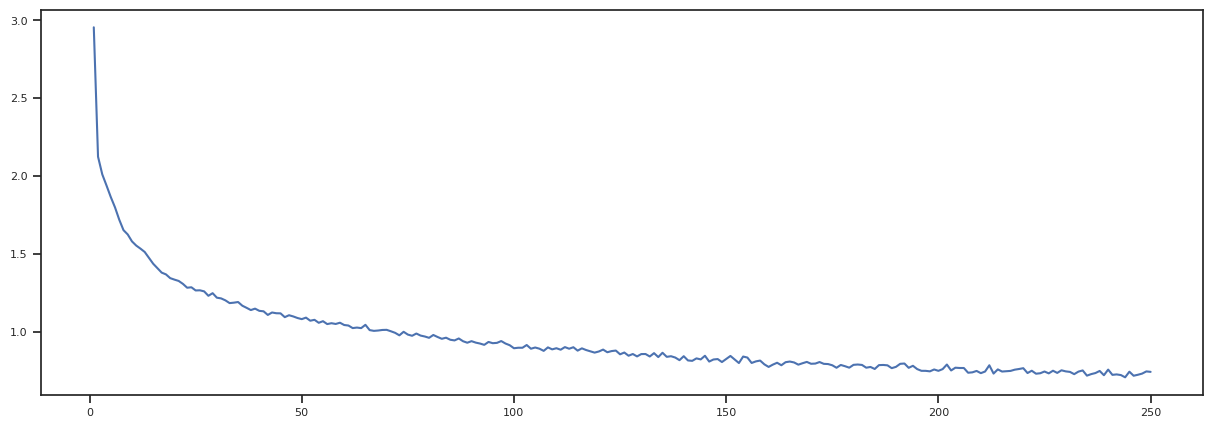

In [4]:
loss = history.history["loss"]
steps = list(range(1, len(loss) + 1))

plt.figure(figsize=(15,5))
plt.plot(steps, loss)
plt.show()

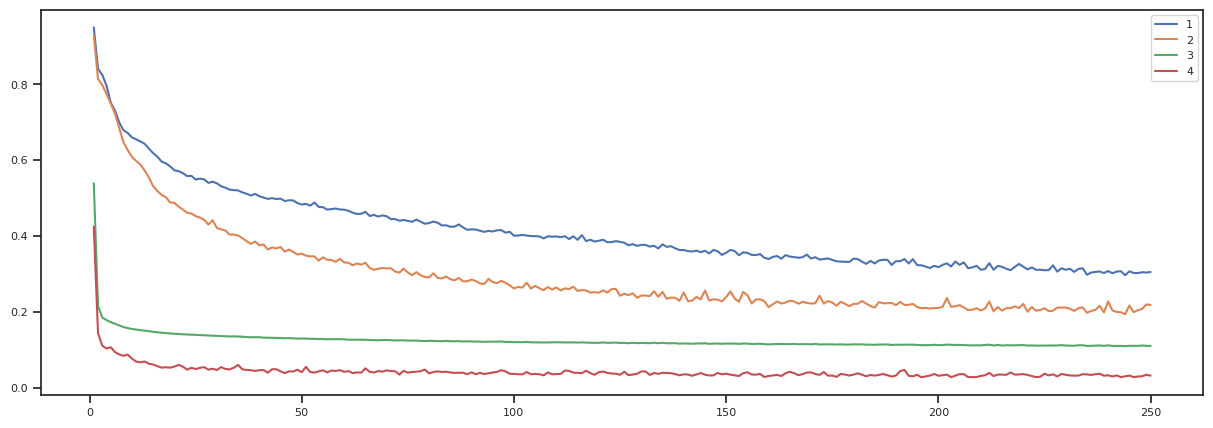

In [5]:
plt.figure(figsize=(15,5))
plt.plot(steps, history.history["output1_loss"], label="1")
plt.plot(steps, history.history["output2_loss"], label="2")
plt.plot(steps, history.history["output3_loss"], label="3")
plt.plot(steps, history.history["output4_loss"], label="4")
plt.legend()
plt.show()

In [6]:
[a1,a2,a3,a4] = model.predict(
  train_X,
  verbose=0,
)

print(a1.shape, a2.shape, a3.shape, a4.shape)

icae_train_X = np.hstack([a1, a2, a3])
icae_train_y = a4[:, 0]

print(icae_train_X.shape, icae_train_y.shape)

(1460, 32) (1460, 21) (1460, 285) (1460, 1)
(1460, 338) (1460,)


In [7]:
[a1,a2,a3,a4] = model.predict(
  test_X,
  verbose=0,
)

print(a1.shape, a2.shape, a3.shape, a4.shape)

icae_test_X = np.hstack([a1, a2, a3])
icae_test_y = a4[:, 0]

print(icae_test_X.shape, icae_test_y.shape)

(1459, 32) (1459, 21) (1459, 285) (1459, 1)
(1459, 338) (1459,)


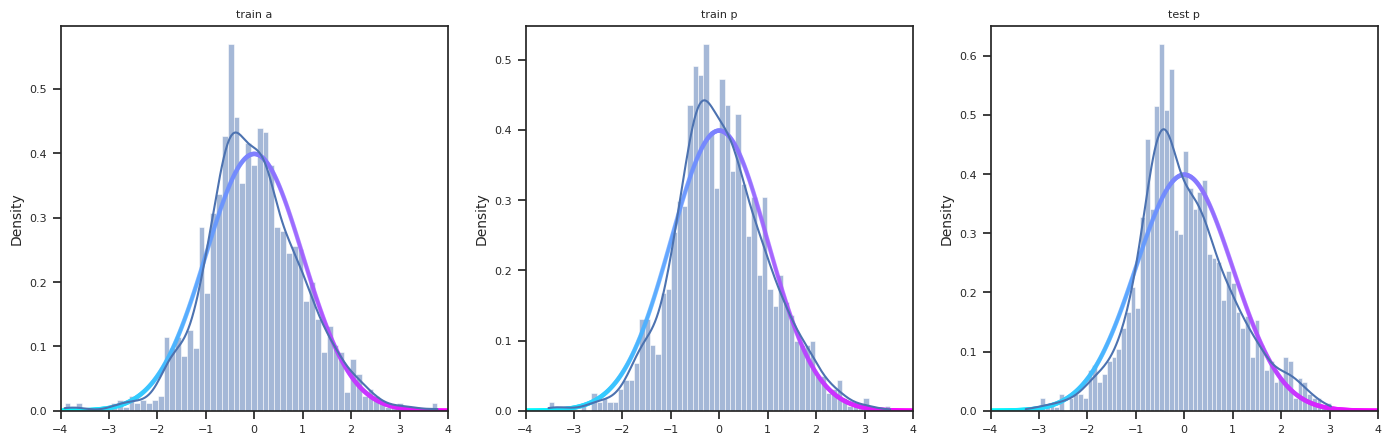

In [8]:
nx = np.linspace(-4,4,1001,True)
ny = scipy.stats.norm.pdf(nx)

plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.histplot(x=train_y, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train a")

plt.subplot(1,3,2)
sns.histplot(x=icae_train_y, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train p")

plt.subplot(1,3,3)
sns.histplot(x=icae_test_y, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("test p")

plt.show()

In [9]:
icae_train_y.min(), icae_train_y.max()

(-3.5249207, 3.52891)

In [10]:
icae_test_y.min(), icae_test_y.max()

(-3.2729747, 3.0288446)

In [11]:
train_X_fixed = train_X.copy()
train_X_fixed[train_X_nas] = icae_train_X[train_X_nas]

test_X_fixed = test_X.copy()
test_X_fixed[test_X_nas] = icae_test_X[test_X_nas]

REDO MLP USING FIXED

In [18]:
keras.utils.set_random_seed(100)

n_features = train_X.shape[1]

rmodel = keras.Sequential([
  keras.layers.Input(shape=(n_features,), name="input"),
  keras.layers.Dense(
    500, activation="relu",
    kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.L2(1e-4),
    activity_regularizer=keras.regularizers.L2(1e-5),
    name="hidden1",
  ),
  keras.layers.Dropout(0.05, seed=101, name="dropout1"),
  keras.layers.Dense(
    1000, activation="relu",
    kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.L2(1e-4),
    activity_regularizer=keras.regularizers.L2(1e-5),
    name="hidden2",
  ),
  keras.layers.Dropout(0.05, seed=102, name="dropout2"),
  keras.layers.Dense(
    500, activation="relu",
    kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.L2(1e-4),
    activity_regularizer=keras.regularizers.L2(1e-5),
    name="hidden3",
  ),
  keras.layers.Dropout(0.05, seed=103, name="dropout3"),
  keras.layers.Dense(1, activation="linear", name="output")
])

rmodel.compile(
    loss=keras.losses.MeanSquaredError(name="MSE"),
    optimizer=keras.optimizers.Adam(),
    metrics=[
      keras.metrics.RootMeanSquaredError(name="RMSE"),
      keras.metrics.MeanAbsoluteError(name="MAE"),
    ]
)

rhistory = rmodel.fit(
    train_X, # TODO: HOW ? Why not use fixed ?
    train_y,
    epochs=250,
);

print("train:", rmodel.evaluate(
  train_X_fixed,
  train_y,
  verbose=0,
))

train_y_pred_fixed = rmodel.predict(
  train_X_fixed, 
  verbose=0,
)[:,0]

test_y_pred_fixed = rmodel.predict(
  test_X_fixed, 
  verbose=0,
)[:,0]

Epoch 1/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - MAE: 0.4440 - RMSE: 0.5995 - loss: 0.9403
Epoch 2/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - MAE: 0.2783 - RMSE: 0.3872 - loss: 0.6531
Epoch 3/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - MAE: 0.2228 - RMSE: 0.3278 - loss: 0.5709
Epoch 4/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - MAE: 0.1799 - RMSE: 0.2561 - loss: 0.4950
Epoch 5/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - MAE: 0.1408 - RMSE: 0.1907 - loss: 0.4363
Epoch 6/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - MAE: 0.1360 - RMSE: 0.1923 - loss: 0.4099
Epoch 7/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - MAE: 0.1466 - RMSE: 0.2135 - loss: 0.3938
Epoch 8/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - MAE: 0.1226 - RMSE: 0.1653 - loss: 0.3524
Epoch 9/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - MAE: 0.1114 - RMSE: 0.1534 - loss: 0.3266
Epoch 10/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - MAE: 0.1312 - RMSE: 0.1775 - loss: 0.3145
Epoch 11/250
46/46 ━━━━━━━━━━━━━━━━━━

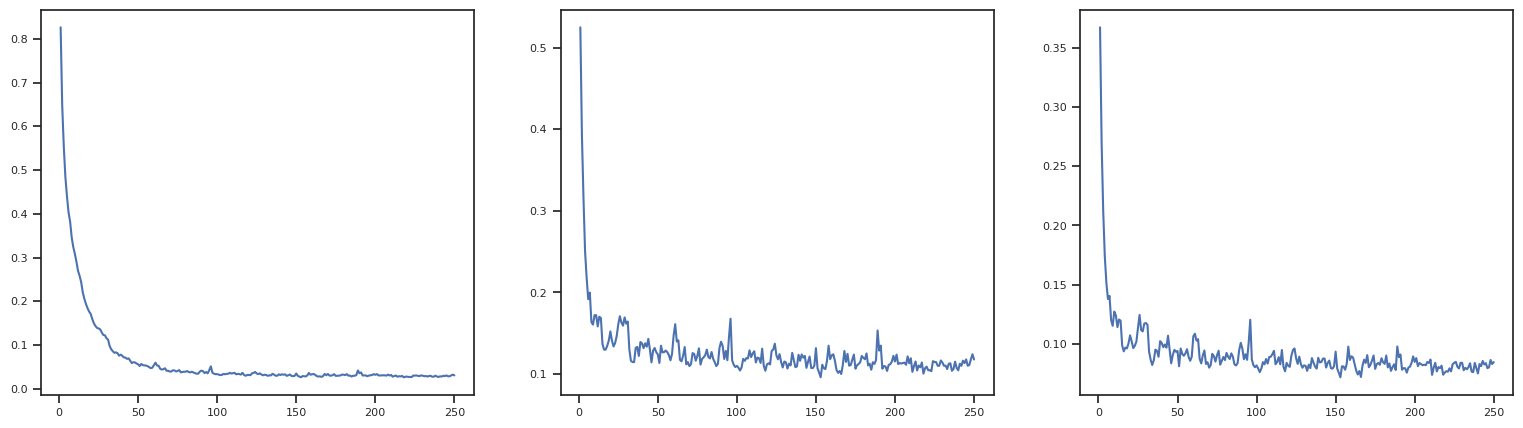

In [20]:
mse = rhistory.history["loss"]
rmse = rhistory.history["RMSE"]
mae = rhistory.history["MAE"]
steps = list(range(1, len(mse) + 1))

plt.figure(figsize=(19, 5))
plt.subplot(1,3,1)
plt.plot(steps, mse)
plt.subplot(1,3,2)
plt.plot(steps, rmse)
plt.subplot(1,3,3)
plt.plot(steps, mae)
plt.show()

In [21]:
train_y_pred_fixed.min(), train_y_pred_fixed.max()

(-3.5856001, 3.5893419)

In [22]:
test_y_pred_fixed.min(), test_y_pred_fixed.max()

(-3.6537719, 3.0552804)

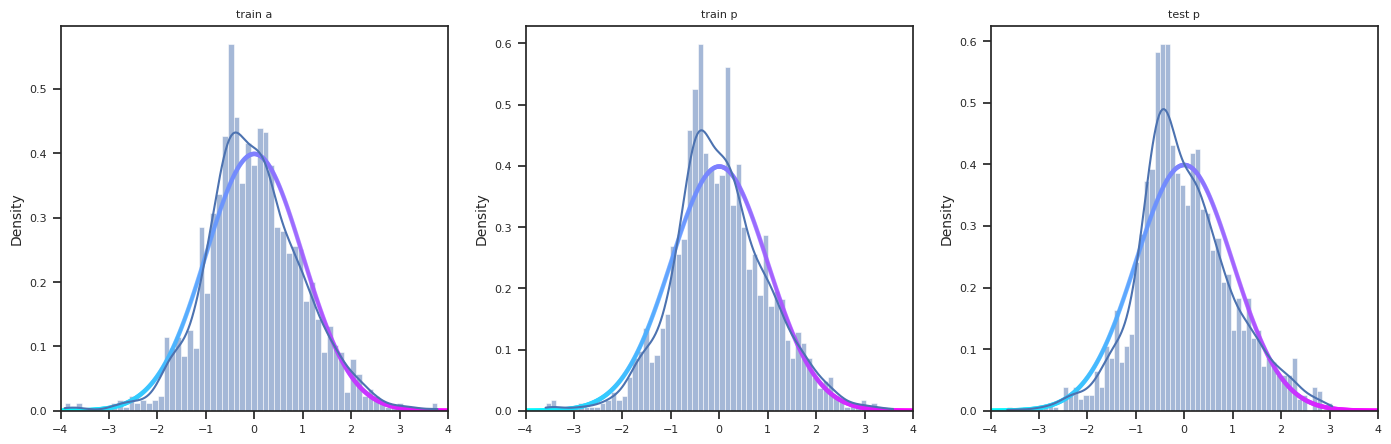

In [23]:
nx = np.linspace(-4,4,1001,True)
ny = scipy.stats.norm.pdf(nx)

plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.histplot(x=train_y, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train a")

plt.subplot(1,3,2)
sns.histplot(x=train_y_pred_fixed, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train p")

plt.subplot(1,3,3)
sns.histplot(x=test_y_pred_fixed, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("test p")

plt.show()

In [24]:
pd.Series(
  data=test_y_pred_fixed,
  name="SalePrice"
).to_csv("tmp.csv", index=False, float_format="%.15f")